## **Modelo Regresión**

Un modelo de regresión es una herramienta estadística que se utiliza para analizar la relación entre una variable dependiente (la variable que se está estudiando) y una o más variables independientes (las variables que se cree que tienen un efecto sobre la variable dependiente). El objetivo principal es entender cómo las variables independientes explican la variabilidad de la variable dependiente.


**Modelos de Series Tiempo**


Las series de tiempo son conjuntos de datos que representan observaciones recopiladas, registradas o recopiladas secuencialmente a lo largo del tiempo. Estas observaciones se toman en intervalos regulares o irregulares, y cada punto de datos en la serie está asociado con un momento específico en el tiempo.

Las series de tiempo se utilizan comúnmente en estadísticas, economía, finanzas, meteorología y otras disciplinas para analizar patrones temporales, identificar tendencias, predecir valores futuros y comprender la variabilidad a lo largo del tiempo. Pueden incluir datos como ventas mensuales, temperaturas diarias, tasas de interés a lo largo del tiempo, entre otros.

## **Librerias**

In [69]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go




# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'
# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

def MapearVariables(df):
  Variables=df.columns.tolist()
  Lista_TipoDato=[]
  Lista_CantUnicos=[]
  Lista_VectorUnicos=[]
  Lista_CantNulos=[]
  for i in range(len(Variables)):
    Lista_TipoDato.append(df[Variables[i]].dtype)
    Lista_CantUnicos.append(df[Variables[i]].nunique())
    Lista_VectorUnicos.append(df[Variables[i]].unique().tolist())
    Lista_CantNulos.append(df[Variables[i]].isnull().sum())
  Resumen=pd.DataFrame({"Variable":Variables,"TipoDato":Lista_TipoDato,
                      "CatUnicos":Lista_CantUnicos,"VectorUnicos":Lista_VectorUnicos,
                      "Nulos":Lista_CantNulos})
  Resumen["PorcentajeNulos"]=(Resumen["Nulos"]/len(df))*100
  return Resumen

## **Importar**

In [10]:
df= pd.read_csv("https://raw.githubusercontent.com/Oscar19922017/ModelosRegresi-n/main/Servicios_Dia_Autos.csv")

In [11]:
Mapeo1=MapearVariables(df)

In [12]:
Mapeo1

Variable TipoDato  CatUnicos  \
0             Date   object       1885   
1  ANTIOQUIA_CHOCO    int64        759   
2           CENTRO    int64        549   
3     EJE_CAFETERO    int64        144   
4            NORTE    int64        224   
5        OCCIDENTE    int64        301   
6            Total    int64       1098   

                                        VectorUnicos  Nulos  PorcentajeNulos  
0  [2017-01-01, 2017-01-02, 2017-01-03, 2017-01-0...      0              0.0  
1  [305, 452, 406, 335, 360, 480, 518, 401, 329, ...      0              0.0  
2  [197, 318, 296, 260, 265, 327, 374, 256, 237, ...      0              0.0  
3  [56, 101, 93, 81, 118, 129, 131, 106, 83, 88, ...      0              0.0  
4  [88, 124, 148, 131, 113, 150, 197, 97, 138, 11...      0              0.0  
5  [74, 171, 139, 123, 141, 163, 115, 89, 167, 12...      0              0.0  
6  [720, 1166, 1082, 930, 997, 1249, 1383, 1009, ...      0              0.0

**Recodificar Fechas**

In [13]:
df["Date"]=df["Date"].apply(pd.to_datetime)

In [14]:
Mapeo1=MapearVariables(df)
Mapeo1

Variable        TipoDato  CatUnicos  \
0             Date  datetime64[ns]       1885   
1  ANTIOQUIA_CHOCO           int64        759   
2           CENTRO           int64        549   
3     EJE_CAFETERO           int64        144   
4            NORTE           int64        224   
5        OCCIDENTE           int64        301   
6            Total           int64       1098   

                                        VectorUnicos  Nulos  PorcentajeNulos  
0  [1483228800000000000, 1483315200000000000, 148...      0              0.0  
1  [305, 452, 406, 335, 360, 480, 518, 401, 329, ...      0              0.0  
2  [197, 318, 296, 260, 265, 327, 374, 256, 237, ...      0              0.0  
3  [56, 101, 93, 81, 118, 129, 131, 106, 83, 88, ...      0              0.0  
4  [88, 124, 148, 131, 113, 150, 197, 97, 138, 11...      0              0.0  
5  [74, 171, 139, 123, 141, 163, 115, 89, 167, 12...      0              0.0  
6  [720, 1166, 1082, 930, 997, 1249, 1383, 1009, ...      0              0.0

In [15]:
## Periodo de análisis
df["Date"].min(),df["Date"].max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2022-02-28 00:00:00'))

In [16]:
df.shape

(1885, 7)

In [17]:
df.head()

Date  ANTIOQUIA_CHOCO  CENTRO  EJE_CAFETERO  NORTE  OCCIDENTE  Total
0 2017-01-01              305     197            56     88         74    720
1 2017-01-02              452     318           101    124        171   1166
2 2017-01-03              406     296            93    148        139   1082
3 2017-01-04              335     260            81    131        123    930
4 2017-01-05              360     265           118    113        141    997

## **Seleccionamos una Regional**

In [18]:
df=df[["Date","ANTIOQUIA_CHOCO"]]

In [22]:
df.rename(columns={"ANTIOQUIA_CHOCO":"y"},inplace=True)

In [23]:
df

Date    y
0    2017-01-01  305
1    2017-01-02  452
2    2017-01-03  406
3    2017-01-04  335
4    2017-01-05  360
...         ...  ...
1880 2022-02-24  557
1881 2022-02-25  819
1882 2022-02-26  987
1883 2022-02-27  435
1884 2022-02-28  696

[1885 rows x 2 columns]

## **Análisis Exploratorio**

* usando plotly= https=//plotly.com/python/time-series/

In [24]:
# conda install -c conda-forge plotly
# !pip install plotly

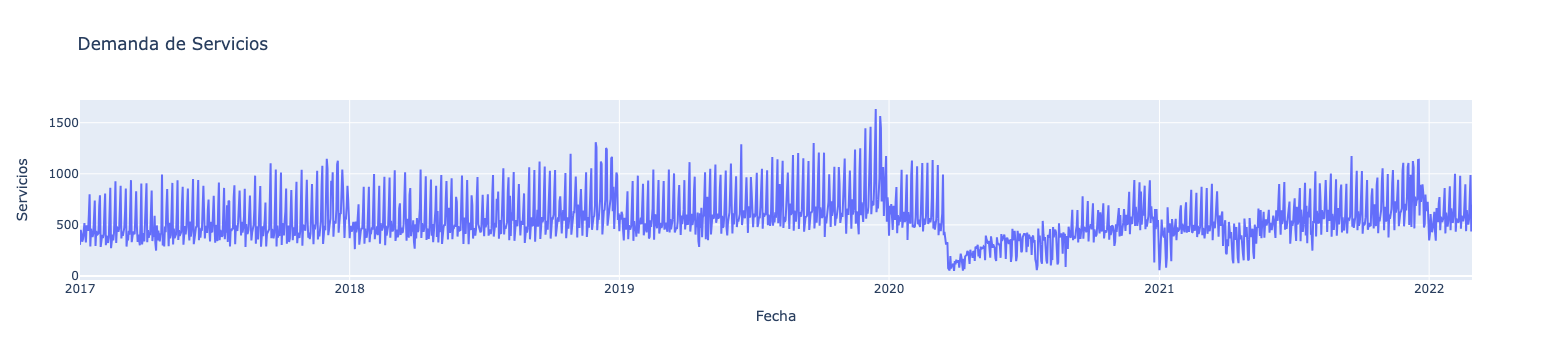

In [25]:
fig= go.Figure()
fig.add_trace(go.Scatter(x=df["Date"],y=df["y"],mode="lines"))
fig.update_layout(title="Demanda de Servicios",
                 xaxis_title="Fecha",
                 yaxis_title="Servicios")

fig.show()

## **Análisis de Estacionalidad**

In [26]:
X=df.copy()

In [27]:
X.set_index("Date",inplace=True)

In [28]:
X.head()

y
Date           
2017-01-01  305
2017-01-02  452
2017-01-03  406
2017-01-04  335
2017-01-05  360

In [29]:
X.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22',
               '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26',
               '2022-02-27', '2022-02-28'],
              dtype='datetime64[ns]', name='Date', length=1885, freq=None)

**Crear Variables Temporales**

In [30]:
## Dia se la semana (0-6) 0 es lunes, .... 6 domingo
X["day"]=X.index.day_of_week
## Semana 
X["week"]=X.index.week
## dia del año
X["dayofyear"]=X.index.day_of_year
## Dia del mes
X["dayofmonth"]=X.index.day
## Mes del Año
X["month"]=X.index.month
## Año
X["year"]=X.index.year

In [31]:
X.head()

y  day  week  dayofyear  dayofmonth  month  year
Date                                                          
2017-01-01  305    6    52          1           1      1  2017
2017-01-02  452    0     1          2           2      1  2017
2017-01-03  406    1     1          3           3      1  2017
2017-01-04  335    2     1          4           4      1  2017
2017-01-05  360    3     1          5           5      1  2017

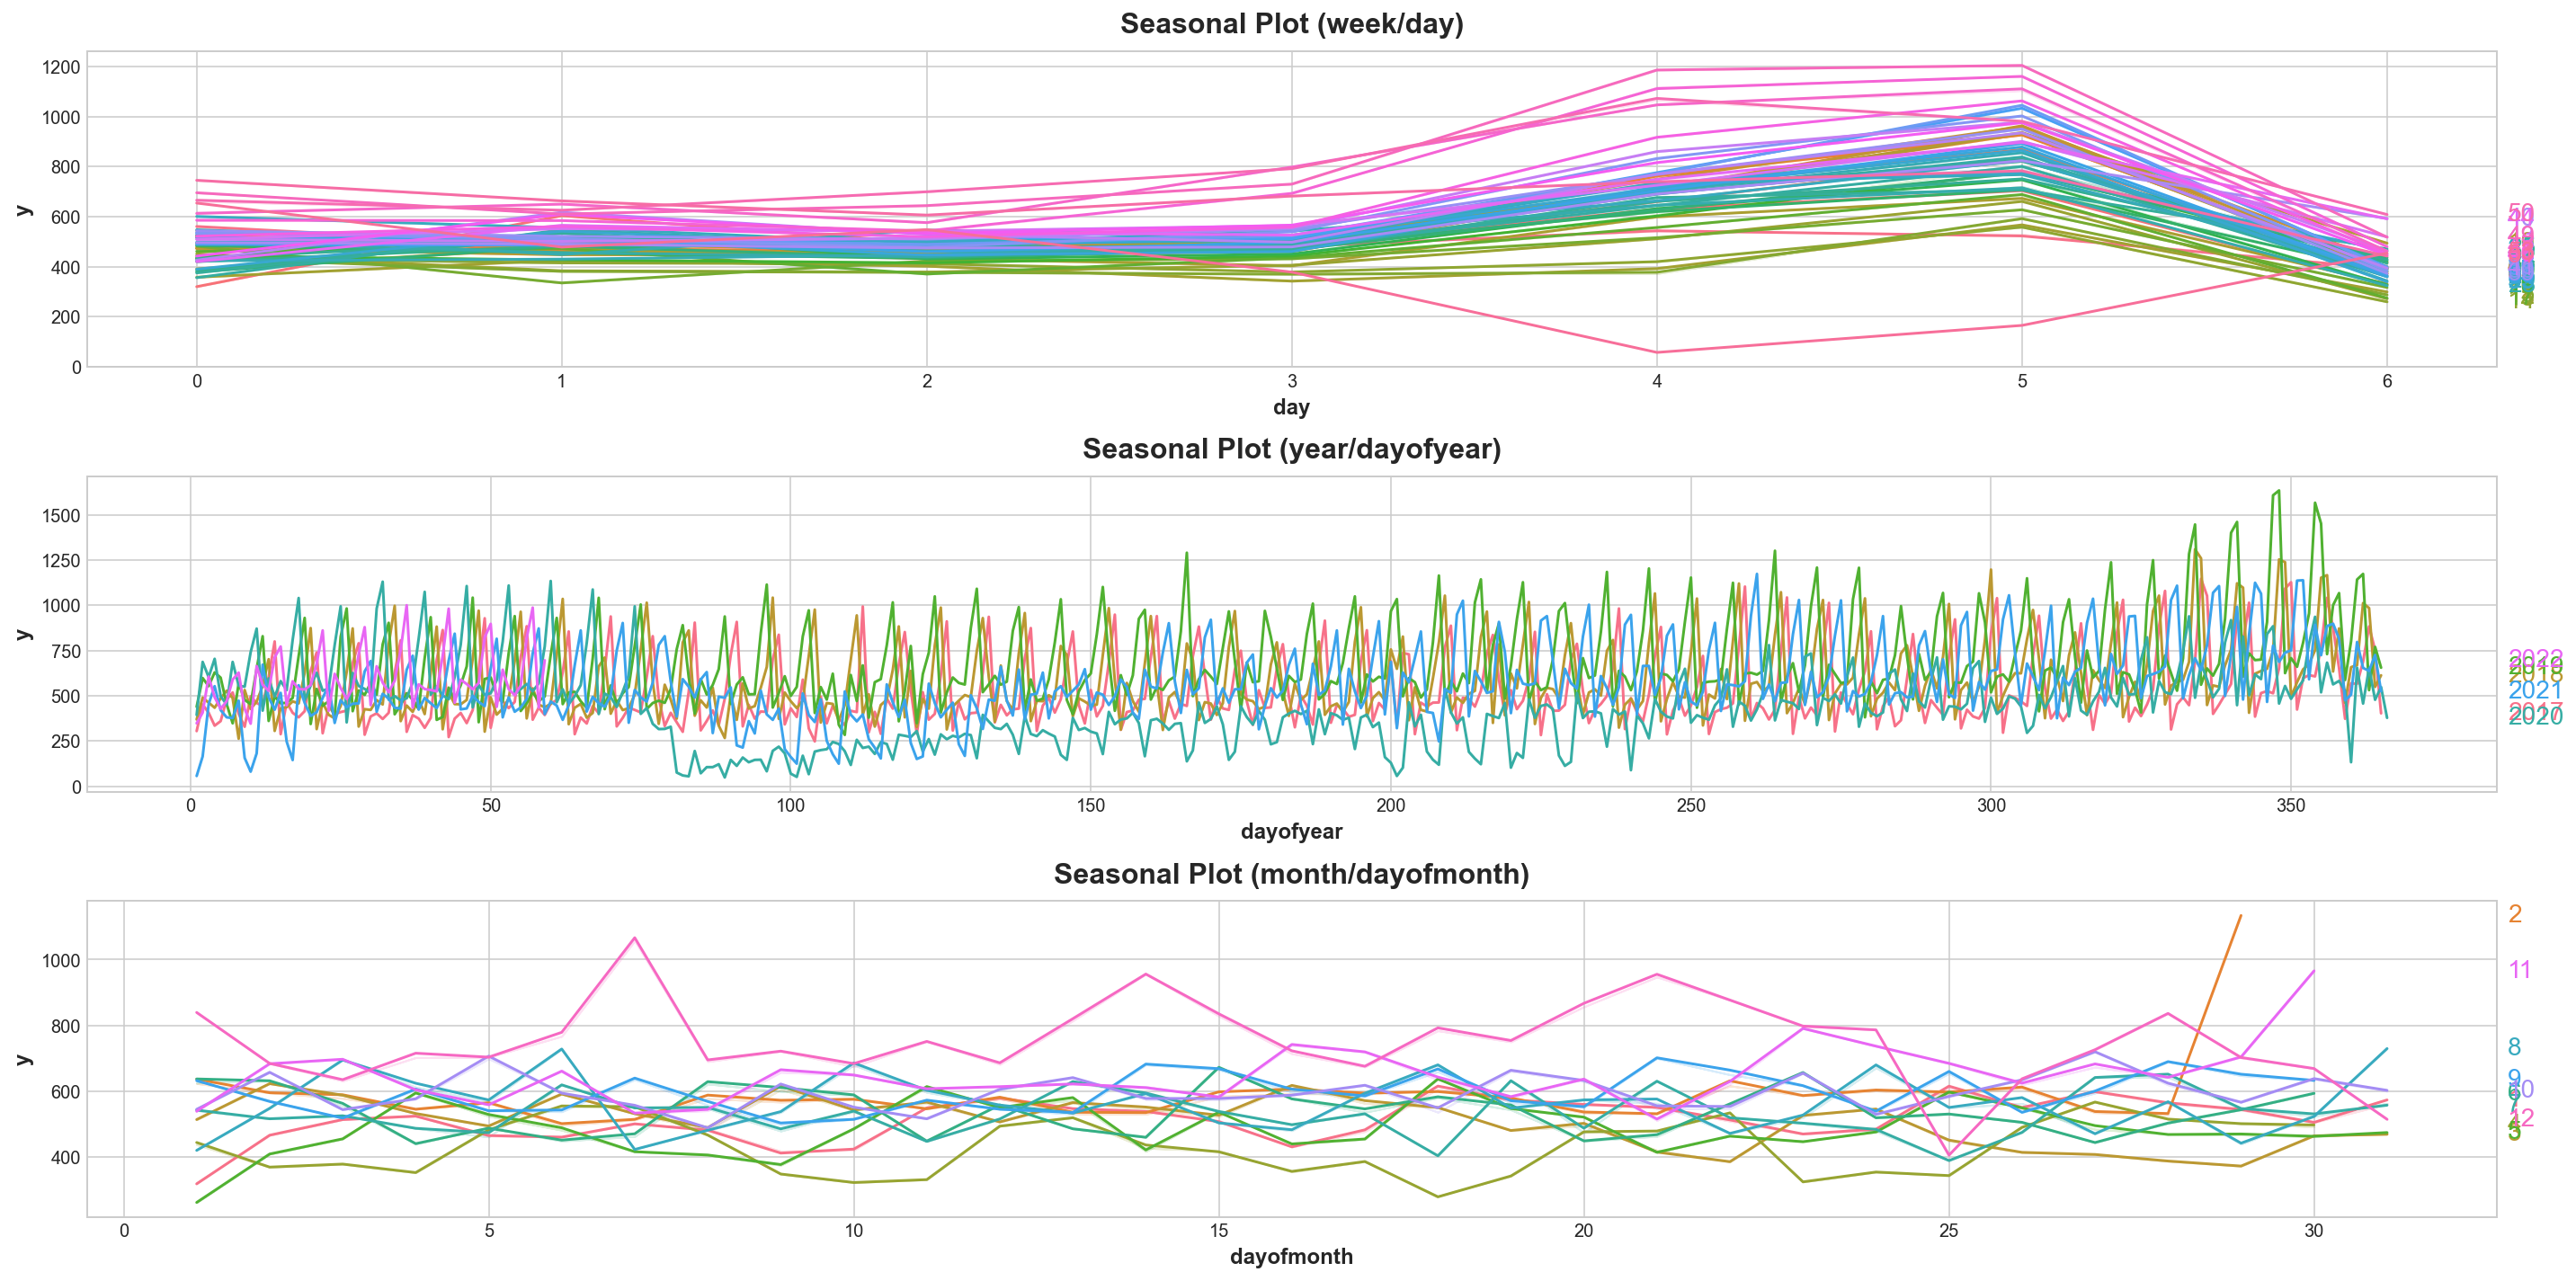

In [32]:
fig, (ax0, ax1,ax2) = plt.subplots(3, 1, figsize=(20, 10))
seasonal_plot(X,y="y",period="week",freq="day",ax=ax0)
seasonal_plot(X,y="y",period="year",freq="dayofyear",ax=ax1)
seasonal_plot(X,y="y",period="month",freq="dayofmonth",ax=ax2);

## **Gráfico Evidenciar Todas las estacionalidades que Tiene la Serie Temporal**


### **Periodograma**


Un periodograma es una herramienta utilizada en análisis de series temporales y procesamiento de señales para identificar patrones de periodicidad o frecuencias dominantes en un conjunto de datos a lo largo del tiempo. En otras palabras, proporciona información sobre la presencia y la intensidad de componentes periódicos en una serie temporal.

Aquí hay algunos conceptos clave relacionados con el periodograma=

* Transformada de Fourier Discreta (DFT)= El periodograma generalmente se calcula mediante la Transformada de Fourier Discreta, que convierte una serie temporal desde el dominio del tiempo al dominio de la frecuencia. Esto permite analizar las frecuencias presentes en la serie.

* Espectro de frecuencia= El periodograma muestra el espectro de frecuencia de una serie temporal, lo que significa que indica qué frecuencias están presentes y con qué intensidad. Cada componente en el espectro representa una frecuencia específica.

* Componentes periódicos= Un periodograma puede revelar patrones periódicos en los datos, lo que es útil en diversas aplicaciones, como identificar ciclos estacionales en datos económicos o patrones de frecuencia en señales de audio.

* Picos en el periodograma= Los picos en el periodograma indican las frecuencias dominantes en la serie temporal. La altura de estos picos sugiere la intensidad de la componente periódica asociada.

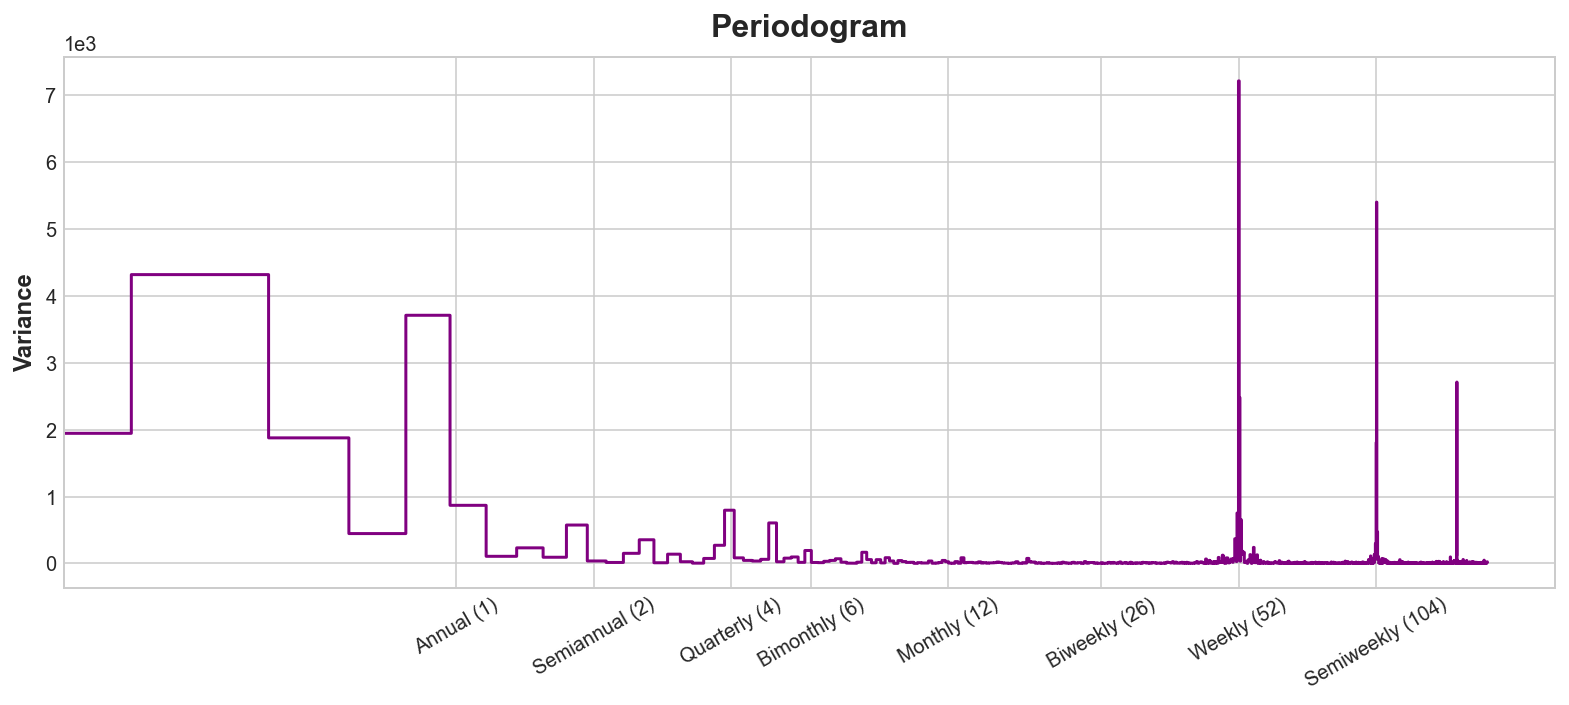

In [33]:
 plot_periodogram(X["y"]);

Podemos evidenciar las siguientes estacionalidades=

* Anual= Se presta mas servcicios en Diciembre
* Se presta mas servicios los días Viernes y Sabado

## **Aplicación de Machine Learning**

**Separamos Datos en Train y Test**

**Datos dummies**

In [34]:
X["day"]=X["day"].map({6:"Domingo",0:"Lunes",1:"Martes",2:"Miercoles",3:"Juves",4:"Viernes",5:"Sabado"})
X["month"]=X["month"].map({1:"Ene",2:"Feb",3:"Mar",4:"Abr",5:"May",6:"Jun",7:"Jul",8:"Ago",9:"Sep",10:"Oct",11:"Nov",12:"Dic"})

In [35]:

X.head()

y        day  week  dayofyear  dayofmonth month  year
Date                                                               
2017-01-01  305    Domingo    52          1           1   Ene  2017
2017-01-02  452      Lunes     1          2           2   Ene  2017
2017-01-03  406     Martes     1          3           3   Ene  2017
2017-01-04  335  Miercoles     1          4           4   Ene  2017
2017-01-05  360      Juves     1          5           5   Ene  2017

In [36]:
dummies=pd.get_dummies(X[["day","month"]],drop_first=True)
dummies.head()

day_Juves  day_Lunes  day_Martes  day_Miercoles  day_Sabado  \
Date                                                                      
2017-01-01          0          0           0              0           0   
2017-01-02          0          1           0              0           0   
2017-01-03          0          0           1              0           0   
2017-01-04          0          0           0              1           0   
2017-01-05          1          0           0              0           0   

            day_Viernes  month_Ago  month_Dic  month_Ene  month_Feb  \
Date                                                                  
2017-01-01            0          0          0          1          0   
2017-01-02            0          0          0          1          0   
2017-01-03            0          0          0          1          0   
2017-01-04            0          0          0          1          0   
2017-01-05            0          0          0          1          0   

            month_Jul  month_Jun  month_Mar  month_May  month_Nov  month_Oct  \
Date                                                                           
2017-01-01          0          0          0          0          0          0   
2017-01-02          0          0          0          0          0          0   
2017-01-03          0          0          0          0          0          0   
2017-01-04          0          0          0          0          0          0   
2017-01-05          0          0          0          0          0          0   

            month_Sep  
Date                   
2017-01-01          0  
2017-01-02          0  
2017-01-03          0  
2017-01-04          0  
2017-01-05          0

In [37]:
BaseModelos=pd.concat([X[["y","week","dayofyear","dayofmonth","year"]],dummies],axis=1)
BaseModelos.head()

y  week  dayofyear  dayofmonth  year  day_Juves  day_Lunes  \
Date                                                                       
2017-01-01  305    52          1           1  2017          0          0   
2017-01-02  452     1          2           2  2017          0          1   
2017-01-03  406     1          3           3  2017          0          0   
2017-01-04  335     1          4           4  2017          0          0   
2017-01-05  360     1          5           5  2017          1          0   

            day_Martes  day_Miercoles  day_Sabado  ...  month_Dic  month_Ene  \
Date                                               ...                         
2017-01-01           0              0           0  ...          0          1   
2017-01-02           0              0           0  ...          0          1   
2017-01-03           1              0           0  ...          0          1   
2017-01-04           0              1           0  ...          0          1   
2017-01-05           0              0           0  ...          0          1   

            month_Feb  month_Jul  month_Jun  month_Mar  month_May  month_Nov  \
Date                                                                           
2017-01-01          0          0          0          0          0          0   
2017-01-02          0          0          0          0          0          0   
2017-01-03          0          0          0          0          0          0   
2017-01-04          0          0          0          0          0          0   
2017-01-05          0          0          0          0          0          0   

            month_Oct  month_Sep  
Date                              
2017-01-01          0          0  
2017-01-02          0          0  
2017-01-03          0          0  
2017-01-04          0          0  
2017-01-05          0          0  

[5 rows x 22 columns]

In [38]:
dias_test=60

In [41]:
datos_train=BaseModelos[:-dias_test]

In [42]:
datos_train.index.min()

Timestamp('2017-01-01 00:00:00')

In [43]:
datos_train.index.max()

Timestamp('2021-12-30 00:00:00')

In [44]:
datos_test=BaseModelos[-dias_test:]

In [45]:
datos_test.index.max()

Timestamp('2022-02-28 00:00:00')

In [46]:
datos_test.index.min()

Timestamp('2021-12-31 00:00:00')

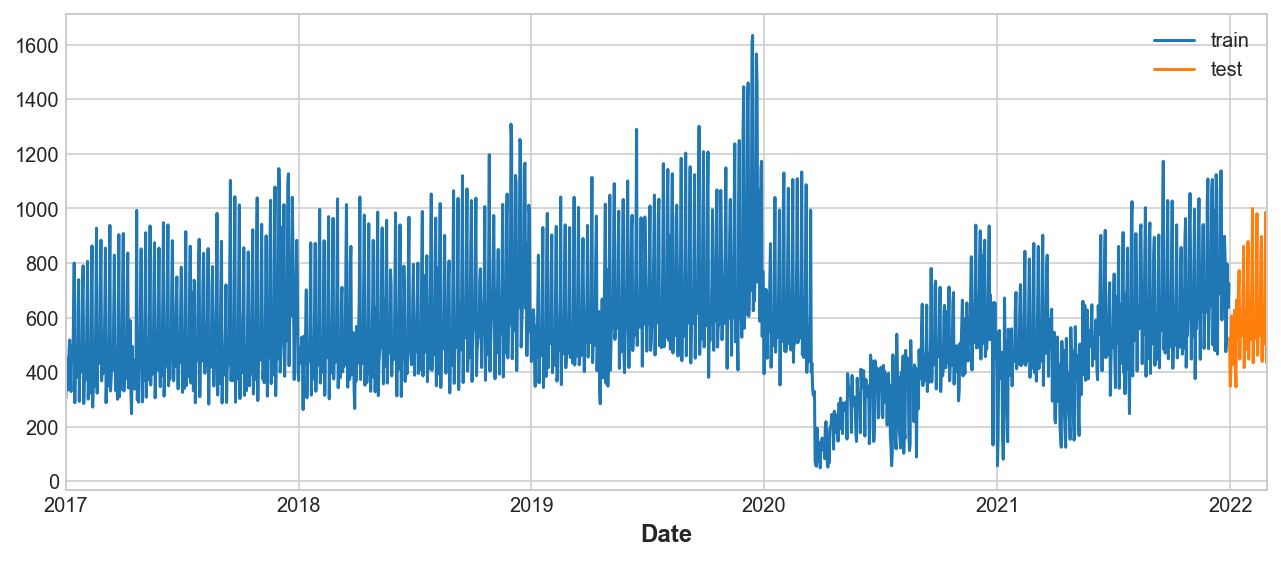

In [47]:
fig, ax = plt.subplots(figsize=(9, 4))
datos_train['y'].plot(ax=ax, label='train')
datos_test['y'].plot(ax=ax, label='test')
ax.legend();

## **Itarar Modelos Pycaret**

In [48]:
from pycaret.regression import *

**Configurar Pycaret**

In [49]:
x_train=datos_train.drop(columns=["y"])
x_test=datos_test.drop(columns=["y"])
y_train=datos_train[["y"]]
y_test=datos_test[["y"]]

In [50]:
y_test.isnull().sum()

y    0
dtype: int64

In [51]:
pycaret_train=pd.concat([x_train,y_train],axis=1)
pycaret_test=pd.concat([x_test,y_test],axis=1)

In [52]:
Model=setup(data=pycaret_train,test_data=pycaret_test,target="y",session_id=123)

In [53]:
models_to_compare = ['rf', 'xgboost', 'lightgbm', 'catboost', 'gbr', 'lr',"dt","et"]
best_model=compare_models(include=models_to_compare,fold=5,sort="RMSE")
best_model

Processing:   0%|          | 0/37 [00:00<?, ?it/s]

LGBMRegressor(random_state=123)

## **Métricas de Precisión para Modelos de Regresión**

### **Error Absoluto Medio (MAE)**

![image.png](attachment=fd85f93e-1b11-40fa-9442-76db91312c9e.png)

* El MAE representa la media de las diferencias absolutas entre las predicciones y los valores reales.
* Es fácil de entender, ya que simplemente promedia la magnitud de los errores sin considerar su dirección. Un MAE más bajo indica un mejor ajuste del modelo.
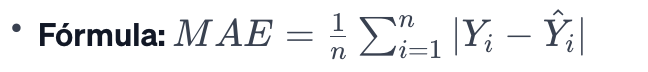

### **Error Cuadrático Medio (MSE)**

![image.png](attachment=4aa00f16-7f61-47de-a5ed-f5f3457c7e9e.png)

* El MSE promedia los cuadrados de las diferencias entre las predicciones y los valores reales.
* Penaliza errores más grandes de manera más significativa debido al cuadrado. Es útil para resaltar y castigar errores grandes. Sin embargo, como está en unidades cuadráticas, la interpretación directa puede ser más difícil.
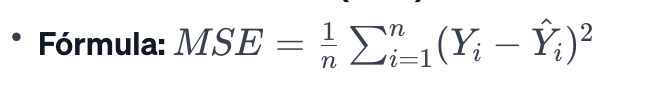

### **Raíz del Error Cuadrático Medio (RMSE)**

![image.png](attachment=a04c6768-4ac5-4cc5-aa76-f16e7d56982a.png)
* El RMSE es simplemente la raíz cuadrada del MSE
* Proporciona una interpretación en la misma escala que la variable de interés, lo que facilita su comprensión. Al igual que el MSE, penaliza errores grandes de manera más significativa.
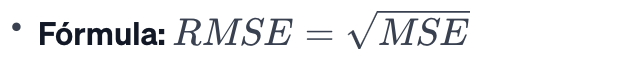

### **Error Porcentual Absoluto Medio (MAPE)**
![image.png](attachment=f25e6722-02ba-4e2a-a5ff-78759cf658ab.png)
* El MAPE expresa el error absoluto como un porcentaje del valor real.
* Es útil cuando se desea entender el error en términos relativos. Por ejemplo, un MAPE del 5% indica que, en promedio, las predicciones tienen un error del 5% en comparación con los valores reales.
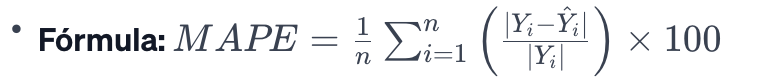

In [54]:
best_model=create_model("lightgbm")

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Finished loading model, total used 100 iterations


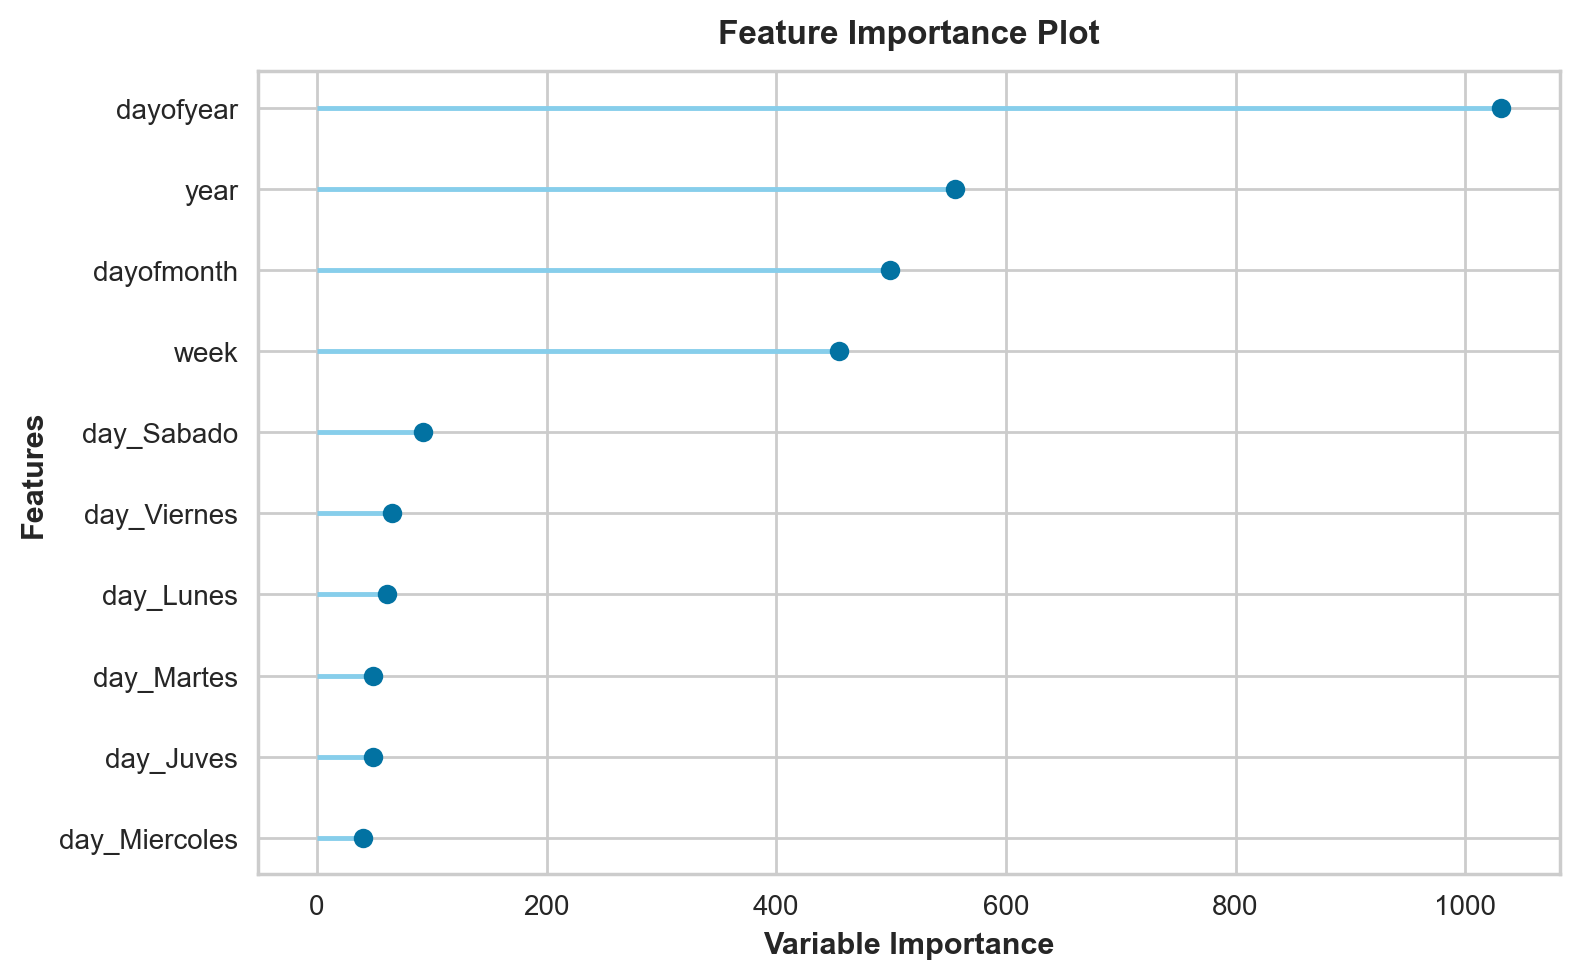

In [55]:
plot_model(best_model, plot='feature');

Finished loading model, total used 100 iterations


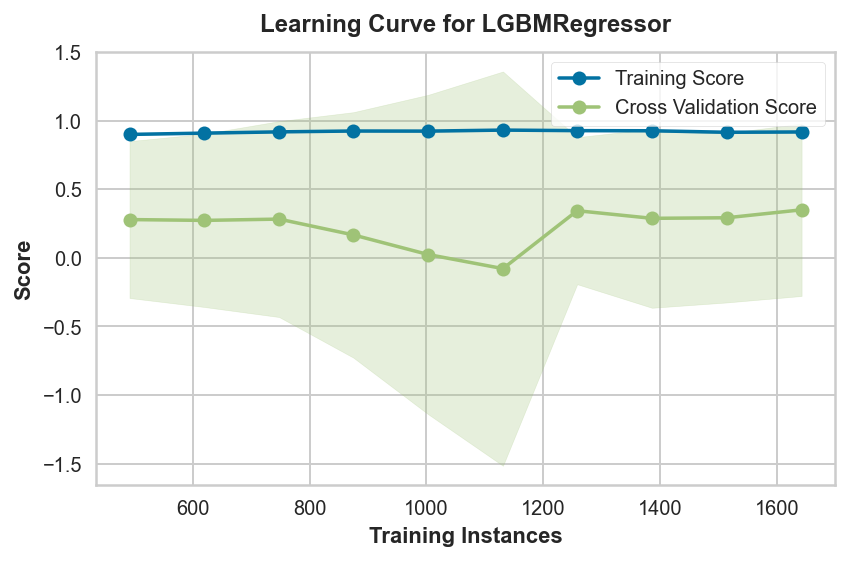

In [56]:
plot_model(best_model, plot='learning')

In [57]:
best_model

LGBMRegressor(random_state=123)

### **Optimización del Modelo**

In [58]:
#tuned_best_model = tune_model(best_model,search_library='scikit-optimize',return_train_score=True,
#                              fold=3,choose_better=True,optimize='RMSE',n_iter=5)

In [59]:
#tuned_best_model.get_params()

In [60]:
hiperparametros= {'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [61]:
import lightgbm as lgb

In [62]:
ModeloFinal=lgb.LGBMRegressor(**hiperparametros)

In [63]:
ModeloFinal.fit(x_train,y_train)

LGBMRegressor(random_state=123)

**Evaluamos el Modelo**

In [64]:
y_pred=ModeloFinal.predict(x_test)

In [71]:
y_test["PrediccionesModelo"]=y_pred.astype(int)

In [72]:
y_test

y  PrediccionesModelo
Date                                
2021-12-31   525                 871
2022-01-01   348                 240
2022-01-02   407                 305
2022-01-03   606                 371
2022-01-04   492                 405
2022-01-05   428                 334
2022-01-06   470                 349
2022-01-07   589                 481
2022-01-08   628                 516
2022-01-09   428                 203
2022-01-10   346                 322
2022-01-11   664                 432
2022-01-12   561                 381
2022-01-13   527                 387
2022-01-14   712                 533
2022-01-15   772                 531
2022-01-16   448                 228
2022-01-17   580                 436
2022-01-18   537                 449
2022-01-19   535                 397
2022-01-20   559                 406
2022-01-21   677                 579
2022-01-22   861                 658
2022-01-23   417                 287
2022-01-24   621                 455
2022-01-25   543                 465
2022-01-26   482                 435
2022-01-27   541                 446
2022-01-28   729                 657
2022-01-29   879                 729
2022-01-30   448                 401
2022-01-31   663                 525
2022-02-01   573                 461
2022-02-02   519                 413
2022-02-03   583                 449
2022-02-04   754                 677
2022-02-05  1000                 801
2022-02-06   434                 367
2022-02-07   563                 480
2022-02-08   537                 462
2022-02-09   532                 401
2022-02-10   524                 445
2022-02-11   720                 662
2022-02-12   981                 846
2022-02-13   462                 380
2022-02-14   589                 474
2022-02-15   565                 489
2022-02-16   536                 426
2022-02-17   571                 459
2022-02-18   823                 685
2022-02-19   897                 848
2022-02-20   439                 376
2022-02-21   644                 494
2022-02-22   537                 465
2022-02-23   503                 445
2022-02-24   557                 478
2022-02-25   819                 724
2022-02-26   987                 862
2022-02-27   435                 382
2022-02-28   696                 497

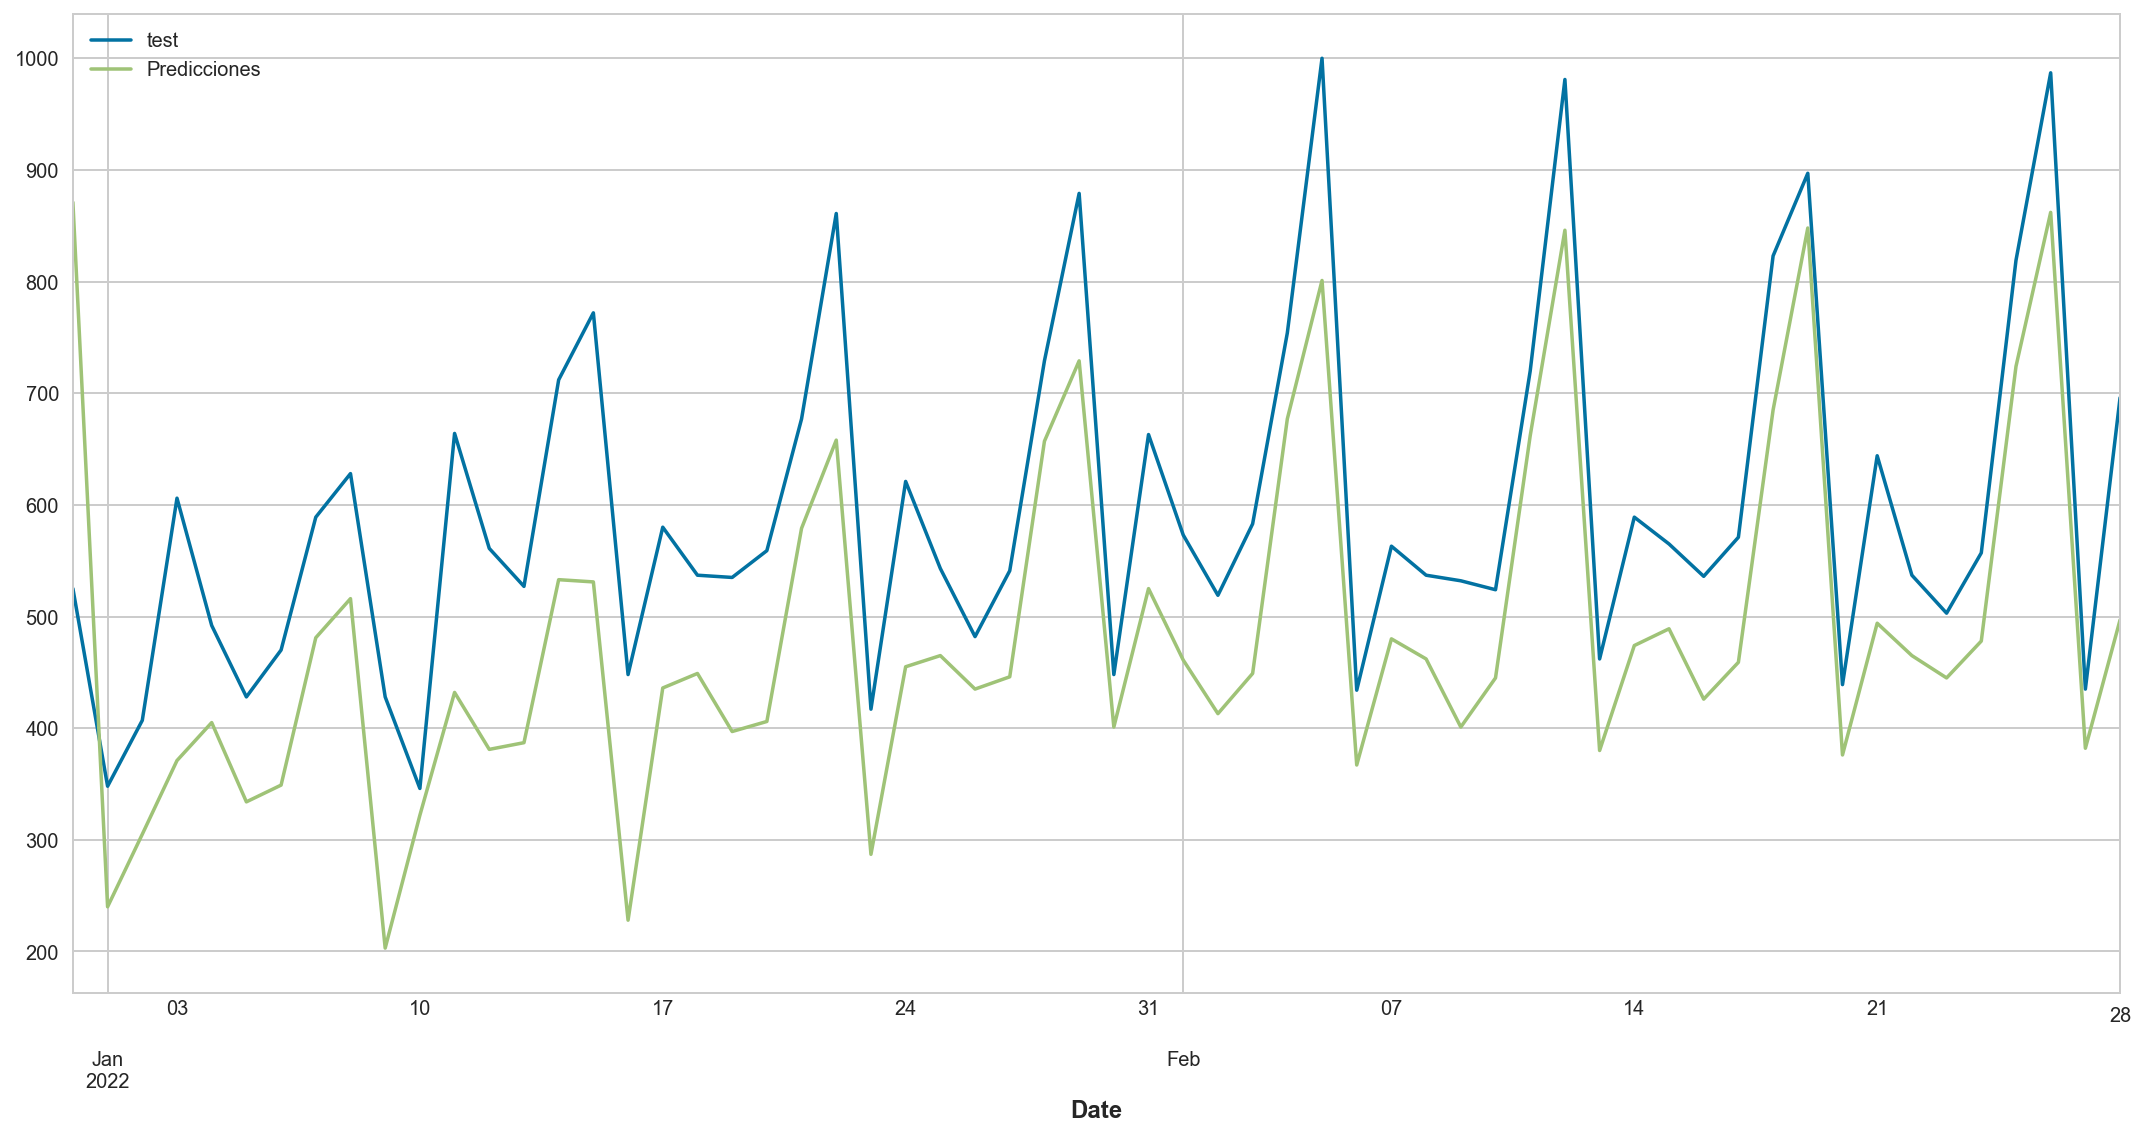

In [79]:
fig, ax = plt.subplots(figsize=(15, 8))
y_test['y'].plot(ax=ax, label='test');
y_test['PrediccionesModelo'].plot(ax=ax, label='Predicciones')
ax.legend();

## **Prophet**

* https://facebook.github.io/prophet/

In [81]:
from prophet import Prophet

In [89]:
df1=datos_train[["y"]]
df1["ds"]=df1.index
df1=df1[["ds","y"]].reset_index(drop=True)

In [92]:
m = Prophet()
m.fit(df1)

20:38:45 - cmdstanpy - INFO - Chain [1] start processing
20:38:46 - cmdstanpy - INFO - Chain [1] done processing


In [93]:
future=m.make_future_dataframe(periods=dias_test)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds         yhat  yhat_lower   yhat_upper
1880 2022-02-24   660.879468  502.783756   827.725262
1881 2022-02-25   865.657098  700.144336  1029.694376
1882 2022-02-26  1005.676267  840.220297  1171.448481
1883 2022-02-27   562.033049  391.400093   718.025407
1884 2022-02-28   649.549633  494.002463   807.627971

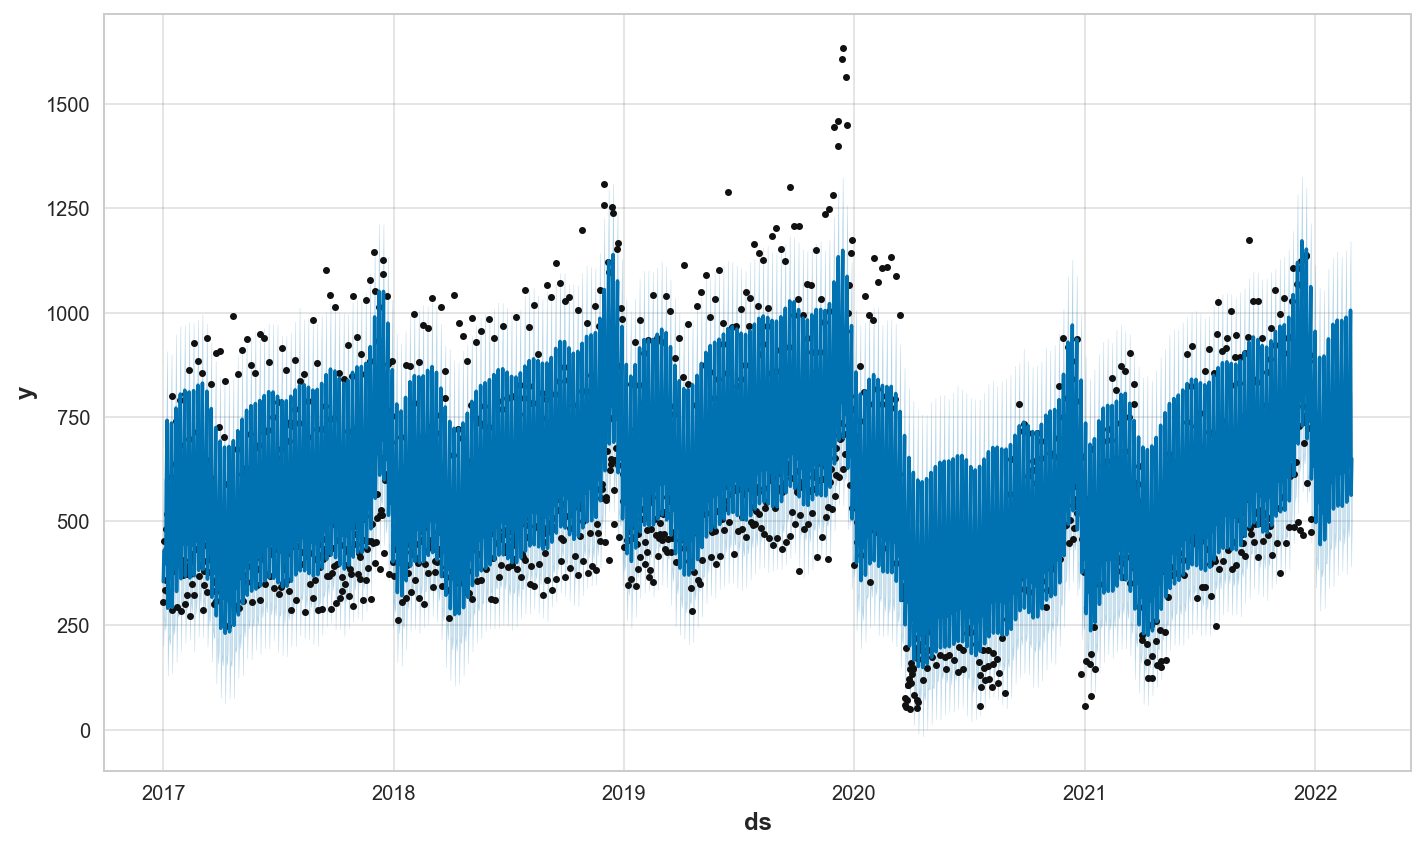

In [94]:
fig1 = m.plot(forecast)

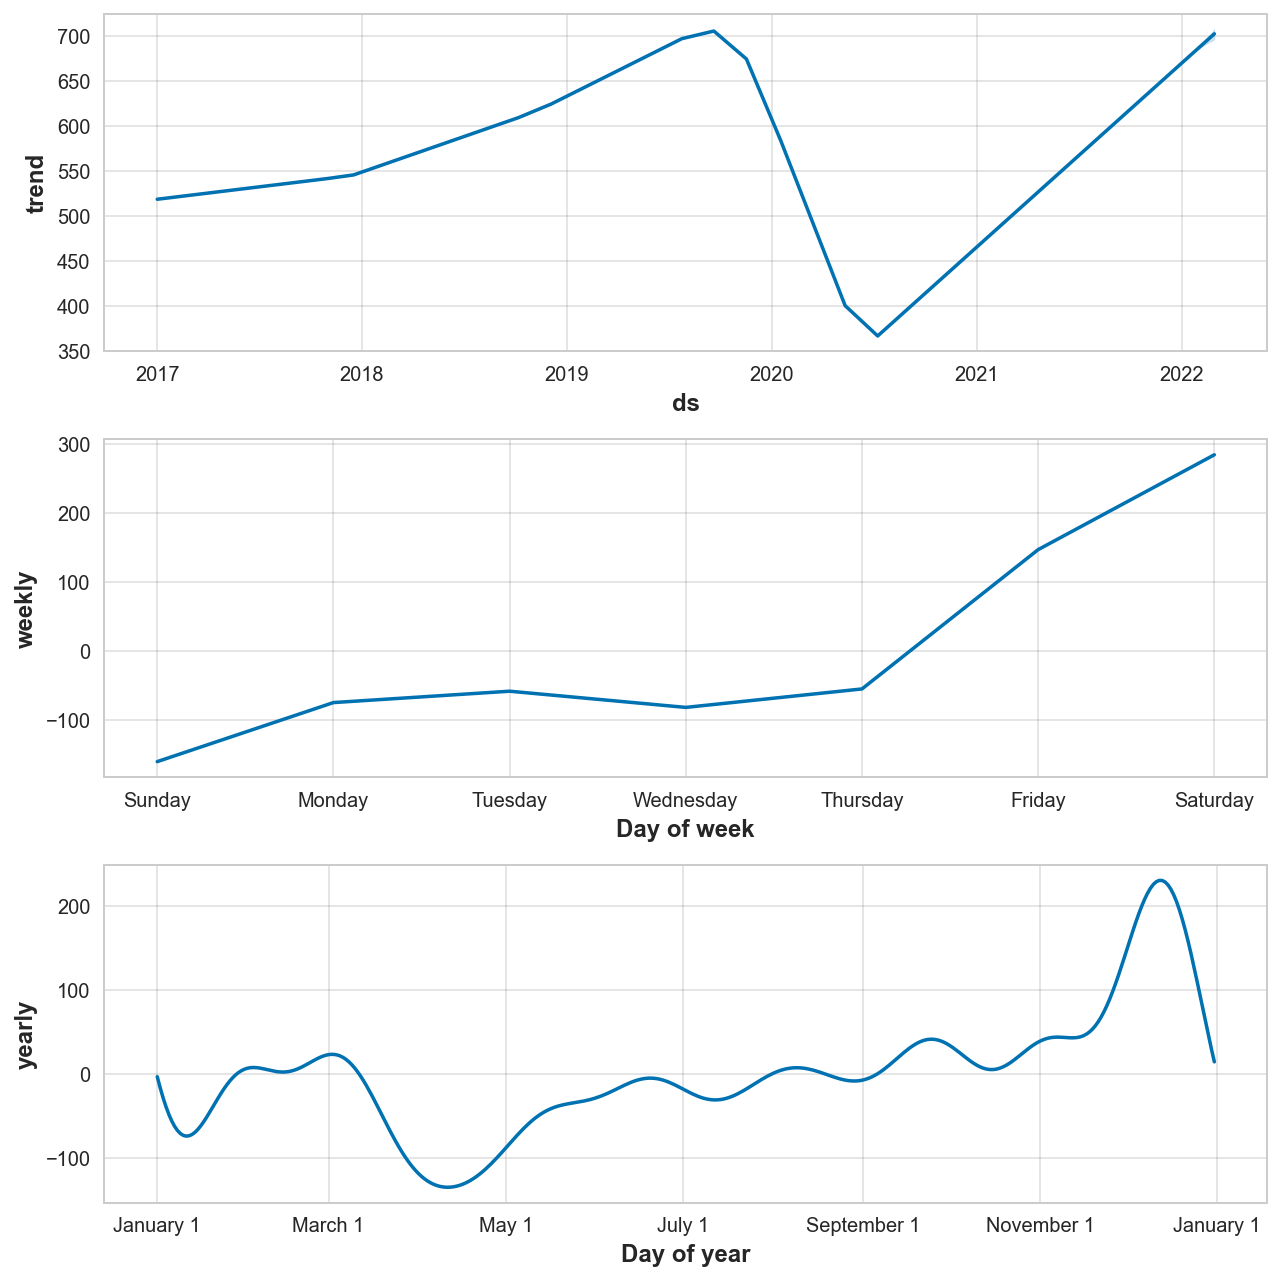

In [95]:
fig2 = m.plot_components(forecast)

In [96]:
Predicciones_FB=forecast[["ds","yhat"]][len(datos_train):]

In [97]:
Predicciones_FB

ds         yhat
1825 2021-12-31   831.175701
1826 2022-01-01   955.179989
1827 2022-01-02   496.725553
1828 2022-01-03   570.839210
1829 2022-01-04   576.942153
1830 2022-01-05   544.344535
1831 2022-01-06   563.500008
1832 2022-01-07   759.626068
1833 2022-01-08   892.594499
1834 2022-01-09   443.559947
1835 2022-01-10   527.376527
1836 2022-01-11   543.291983
1837 2022-01-12   520.445894
1838 2022-01-13   549.127707
1839 2022-01-14   754.400384
1840 2022-01-15   895.993877
1841 2022-01-16   454.936377
1842 2022-01-17   545.973222
1843 2022-01-18   568.262892
1844 2022-01-19   550.876582
1845 2022-01-20   584.057093
1846 2022-01-21   792.842819
1847 2022-01-22   936.961049
1848 2022-01-23   497.458545
1849 2022-01-24   589.119296
1850 2022-01-25   611.158926
1851 2022-01-26   592.722282
1852 2022-01-27   624.140015
1853 2022-01-28   830.549969
1854 2022-01-29   971.787694
1855 2022-01-30   529.014094
1856 2022-01-31   617.130197
1857 2022-02-01   635.468594
1858 2022-02-02   613.288153
1859 2022-02-03   641.027874
1860 2022-02-04   843.925786
1861 2022-02-05   981.907235
1862 2022-02-06   536.210641
1863 2022-02-07   621.800742
1864 2022-02-08   638.058904
1865 2022-02-09   614.277116
1866 2022-02-10   640.911548
1867 2022-02-11   843.201574
1868 2022-02-12   981.058586
1869 2022-02-13   535.692659
1870 2022-02-14   622.027051
1871 2022-02-15   639.390069
1872 2022-02-16   617.010888
1873 2022-02-17   645.275126
1874 2022-02-18   849.346039
1875 2022-02-19   989.055586
1876 2022-02-20   545.533372
1877 2022-02-21   633.623394
1878 2022-02-22   652.578059
1879 2022-02-23   631.555999
1880 2022-02-24   660.879468
1881 2022-02-25   865.657098
1882 2022-02-26  1005.676267
1883 2022-02-27   562.033049
1884 2022-02-28   649.549633

In [98]:
y_test["PrediccionesProphet"]=Predicciones_FB.yhat.values

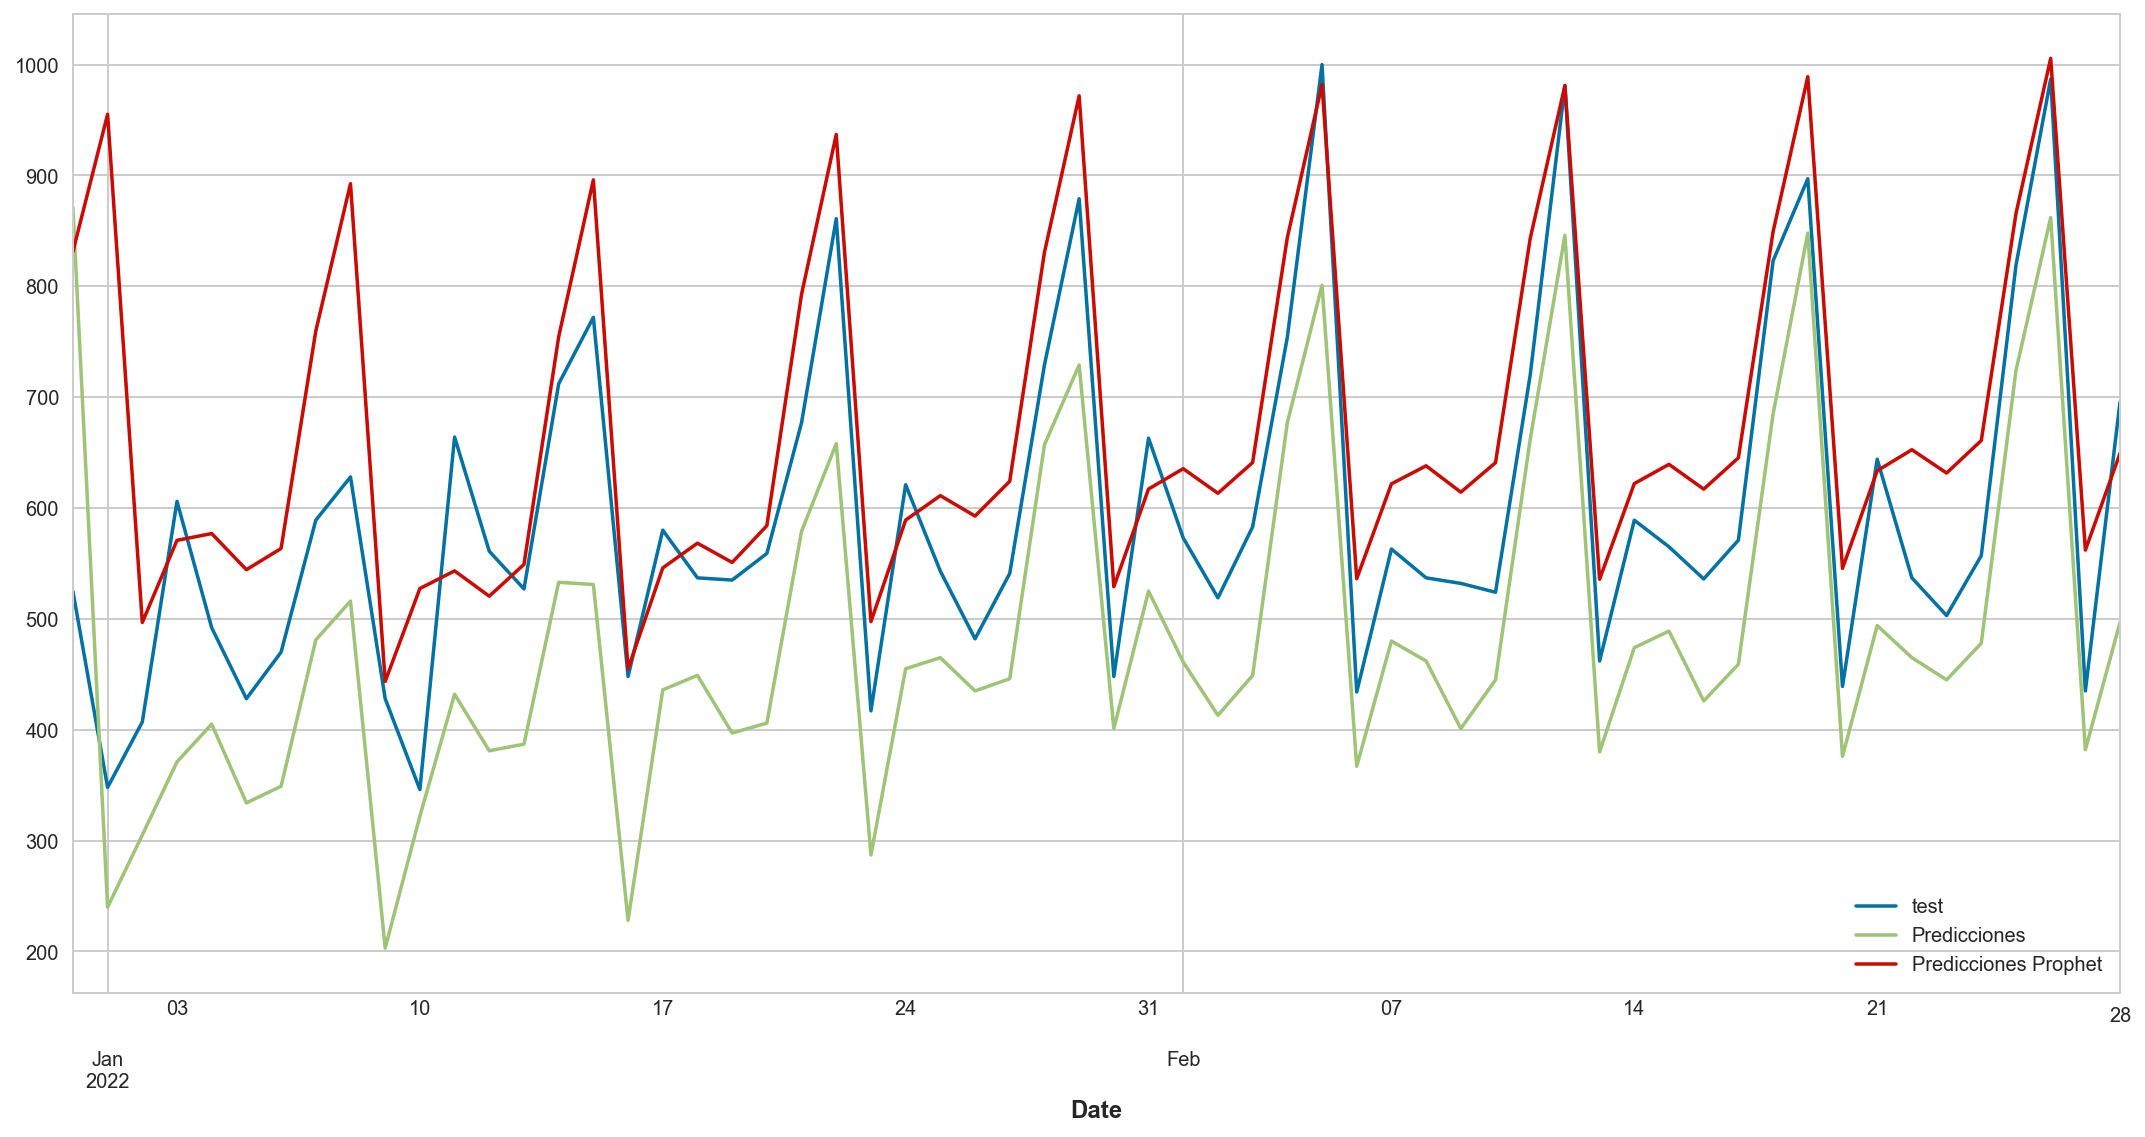

In [99]:
fig, ax = plt.subplots(figsize=(15, 8))
y_test['y'].plot(ax=ax, label='test');
y_test['PrediccionesModelo'].plot(ax=ax, label='Predicciones')
y_test['PrediccionesProphet'].plot(ax=ax, label='Predicciones Prophet')
ax.legend();

In [100]:

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

def rmse (actual, pred):
    actual, pred = np.array (actual), np.array (pred)
    return np.sqrt (np.square (np.subtract (actual, pred)). mean ())

In [102]:
y_test.head()

y  PrediccionesModelo  PrediccionesProphet
Date                                                    
2021-12-31  525                 871           831.175701
2022-01-01  348                 240           955.179989
2022-01-02  407                 305           496.725553
2022-01-03  606                 371           570.839210
2022-01-04  492                 405           576.942153

In [116]:
Mape_Test_Pycaret=MAPE(y_test.y,y_test.PrediccionesModelo)

In [117]:
Mape_Test_Pycaret

21.079870451072743

In [118]:
RMSE_Test_Pycaret=rmse(y_test.y,y_test.PrediccionesModelo)
RMSE_Test_Pycaret

135.99381113369338

In [119]:
Mape_Test_Phophet=MAPE(y_test.y,y_test.PrediccionesProphet)

In [120]:
Mape_Test_Phophet

17.450789413240784

In [121]:
RMSE_Test_Phophet=rmse(y_test.y,y_test.PrediccionesProphet)
RMSE_Test_Phophet

125.10299154923385